<a href="https://colab.research.google.com/github/carolineburns3/finalproject/blob/main/FinalProject_CarolineBurns_CharlieHohl_JelissaKamguem_ElianaLiebman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Mount Drive*

If you would like to save any plots to your drive, mount the drive and set a working directory. 

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive/")

Working_Directory = 'MyDrive/DSFinalProject' #@param {type:"string"}
wd="/content/gdrive/"+Working_Directory
os.chdir(wd)

Mounted at /content/gdrive/


### ***Introduction: Public Education in the US***

The data set being used was found on Kaggle at this link: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Public education across the United States is largely controlled by local and state governments. Revenue for schools varies across states and localities. For example, in 2017-18, 35 percent of Pennsylvania's revenue came from the state government and 60 percent from local property taxes (AFR Data: Summary-Level). This is a similar trend across states, with some states having more state revenue than local.

We are looking to explore how public school revenue and expenditure impacts learning outcomes, specifically math and reading standarized test scores. Using the data set from Kaggle we are able to explore this across states and time.



***Objective***

The goal of this project is to determine if there is a positive correlation between different types of state and local revenues and expenditures, and the academic performance of a student, denoted in this case by math and reading standarized scores. 

A machine learning model will later be created to predict Grade 4 Reading scores. 

### ***Business Understanding***

#### Funding and Achievement Gaps

Across the nation, there is a history of drastic differences in revenue and expenditure between and within states. In 2011-12, the local and state governments of the wealthiest, top 25 percent of public schools in the nation spent $1,500 more per student, on average, than the amount that the poorest, bottom 25 percent did (Barshay, 2020). This is a racialized issue as well. Black students are more often attending poorer schools with resulting lower achievement levels. Despite the end of legal segregation, minorities in the US still have largely separate and unequal education. While Black and Hispanic students make up 15.5 and 25.4 percent of the US population, 44.1 and 56.7 percent, respectively, attend schools where half of the student body is the same race or ethnicity (Geiger, 2017).

Property taxes have an effect on this differential spending by public schools. Segregated towns and cities mean that different locales will be able to produce more or less revenue depending on the number of businesses, homeowners, and other landowners that are paying property taxes (Turner et al., 2016). Simply put, property values vary from place to place, and higher value property indicates a higher property tax revenue. Some states will send more money to less affluent schools but it doesn't always mitigate the effects (Turner et al., 2016).

The Nation's Report Card indicates that there are math and reading achievement gaps between students who qualify for free or reduced lunch and those who don't (NAEP). This qualification is a good indication of socioeconmic class. There is also achievement gaps between white and Black students. Public school revenue and expenditure may be a key variable in reducing these achievement gaps.



#### What can governments do?

In 1968, a lawsuit against a school district for differential funding amongst the state went to the Supreme Court. Those who filed the suit argued that the funding system was unequal. The Supreme Court ruled that because education is not a guaranteed right under the US Constitution there are no rights being violated (Martin et al., 2018). Therefore, it is largely a state and local government issue. In turn, there is a variance in how much states spend per student. In New York, for example, spends about 23.3 thousand dollars per student, while Florida spends 9.6 thousand dollars (Hanson, 2021). Policy solutions would have most direct impact if implemented at the state or local level due to the majority of funds coming from those governments.

# ***Data Understanding***

According to Garrad (2019), the dataset we are using contains information related to student enrollment across the entire United States, separated by state. Data is collected from the United States Census Bureau, the National Center for Education Statistics (NCES), and the Nations Report card and runs from the year 1992 to 2019. It is focused on individual grades and further separated by ethnicity and sex, and it also specifically records the average math and reading scores for grades 4 and 8. The other part of the data set records financial data of the states during this time. This includes state revenue, separated by types of revenue, and expenditures, separated by what the expense is going towards. The enrollment and demographic data is collected from the NCES, the financial data is collected from the U.S Census Bureau, and the Academic achievement data is collected from the Nations Report Card.

The data itself is sorted into a table with columns indicating the data it represents and rows showing what state and year the data is recorded in.

There are small issues to note when dealing with this data set. First, it is important to note that Garrad (2019) explained that the data recorded for ENROLL is from the U.S Census Bureau while the A_A_A (records the same data as ENROLL) is from the NCES data. This will cause some variability in the outcome depending what variable is used. Additionally, the NCES only begins to record gender beginning in 2009. This is more than enough years of data to make accurate models and assumptions based on the data presented. Lastly, the test score data is incomplete and is only available for certain years.   



We created a table with the description of the variables used in our analysis. Descriptions are taken from Garrad (2019).

#### *Data Types*

In [ ]:
import pandas as pd
import requests
import io

url1 = "https://raw.githubusercontent.com/carolineburns3/finalproject/main/FPdatatypes.csv"
download1 = requests.get(url1).content

# Reading the downloaded content and turning it into a pandas dataframe
pd.set_option('max_colwidth', 400)
df1 = pd.read_csv(io.StringIO(download1.decode('utf-8')))

# Printing out the datatypes
df1

,Variable,Data type,Description,Units
0,PRIMARY_KEY,Nominal,A combination of the year and state name,NaN
1,STATE,Nominal,Year in which the data is collected,NaN
2,YEAR,Interval,State in which the data is collected,NaN
3,ENROLL,Ratio,The U.S. Census Bureau's count for students in the state,Whole Numbers
4,TOTAL_REVENUE,Ratio,The total amount of revenue for the state,Thousands of Dollars
5,FEDERAL_REVENUE,Ratio,The total amount of federal revenue for the state,Thousands of Dollars
6,STATE_REVENUE,Ratio,The total amount of state revenue for the state,Thousands of Dollars
7,LOCAL_REVENUE,Ratio,The total amount of local revenue for the state,Thousands of Dollars
8,TOTAL_EXPENDITURE,Ratio,The total expenditure for the state,Thousands of Dollars
9,INSTRUCTION_EXPENDITURE,Ratio,The instruction expenditure for the state,Thousands of Dollars


# ***Data Preparation***

First we download the data from github and show the first 5 rows of the dataset.

In [ ]:
import pandas as pd
import requests
import io
    
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/carolineburns3/finalproject/main/states_all_extended.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,731634.0,58168.0,56139.0,59481.0,57948.0,58970.0,59929.0,62904.0,58025.0,60590.0,50629.0,44000.0,41167.0,55460.0,8224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,207.0,208.0,204.0,208.0,211.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,253.0,NaN,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,122487.0,11030.0,10585.0,10135.0,9748.0,9896.0,9542.0,9392.0,8789.0,9187.0,7889.0,7057.0,6714.0,10152.0,2371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,673477.0,58914.0,56814.0,55630.0,55433.0,54630.0,53832.0,52793.0,49081.0,51426.0,46790.0,39584.0,37410.0,53497.0,2544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,209.0,215.0,206.0,215.0,213.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,266.0,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,441490.0,34929.0,34517.0,34044.0,34632.0,34740.0,35017.0,37448.0,36011.0,33518.0,32700.0,29244.0,27651.0,33511.0,808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,210.0,208.0,211.0,214.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,257.0,NaN,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,5254844.0,443955.0,436488.0,424961.0,418418.0,410701.0,399776.0,388439.0,363296.0,396482.0,375327.0,329527.0,270675.0,431763.0,59067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,208.0,198.0,209.0,207.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,260.0,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, we create a column with per pupil spending so the spending is more comparable by enrollment in each state. The enrollment data from NCES data has less missing values than from the census data, so we use the A_A_A variable in order to avoid removing more values. 

In [ ]:
#divide expenditure by enrollment
df["PER_PUPIL"] = df["TOTAL_EXPENDITURE"]/df["A_A_A"]

Grouping by year helps to see what years have mostly missing values and what years don't. We can see here that 1986-1991 has a lot of missing financial and scores data.

In [ ]:
df.groupby("YEAR").mean()

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,G01_TR_F,G01_TR_M,G01_WH_F,...,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS,PER_PUPIL
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,779473.960784,65842.137255,59883.117647,57510.156863,56782.980392,54408.941176,55015.098039,56850.039216,56269.686275,63851.117647,63038.058824,57912.960784,50990.509804,61305.784314,5387.852941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784474.764706,66805.333333,62211.313725,59732.823529,57600.705882,56873.686275,55118.568627,57067.294118,55657.117647,61630.960784,59216.039216,57561.294118,52565.196078,62657.509804,5844.242424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788013.529412,67844.098039,63204.470588,62098.745098,59813.843137,57746.372549,57582.274510,56961.490196,55941.313725,60907.450980,56756.901961,53897.058824,51954.392157,62909.294118,6421.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,794955.039216,68329.196078,64491.784314,63430.607843,62394.078431,60130.058824,58575.156863,59362.568627,55950.274510,61597.176471,56225.921569,51558.490196,48495.647059,63228.921569,6709.820513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808170.254902,68616.352941,65244.196078,64641.568627,63687.549020,62693.000000,60983.764706,60135.254902,58414.176471,62130.000000,56775.470588,51208.490196,46687.901961,64829.980392,7221.880952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,213.000000,NaN,214.000000,NaN,213.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.000000,NaN,264.256410,NaN,261.948718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,824448.588235,69730.980392,65885.686275,65371.803922,64998.549020,64086.882353,63517.137255,62373.019608,59217.058824,64965.392157,57165.098039,51864.705882,46910.901961,64920.274510,8162.130435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

This dataset has missing data due to different collection by states as well as lack of data from certain years. It's important to see which which specific columns in the data have the most and least missing information. Below is a list of each variable that has missing values and how many values are missing. We will want to use columns with the least missing data.

In [ ]:
#find columns with any null values
column_with_nan = df.columns[df.isnull().any()]
df.shape
(1460, 81)
#print each column with total null values
for column in column_with_nan:
  print(column, df[column].isnull().sum())

ENROLL 491
TOTAL_REVENUE 440
FEDERAL_REVENUE 440
STATE_REVENUE 440
LOCAL_REVENUE 440
TOTAL_EXPENDITURE 440
INSTRUCTION_EXPENDITURE 440
SUPPORT_SERVICES_EXPENDITURE 440
OTHER_EXPENDITURE 491
CAPITAL_OUTLAY_EXPENDITURE 440
A_A_A 83
G01_A_A 83
G02_A_A 83
G03_A_A 83
G04_A_A 83
G05_A_A 83
G06_A_A 83
G07_A_A 83
G08_A_A 83
G09_A_A 83
G10_A_A 83
G11_A_A 83
G12_A_A 83
KG_A_A 83
PK_A_A 173
G01-G08_A_A 695
G09-G12_A_A 644
G01_AM_F 1308
G01_AM_M 1307
G01_AS_F 1307
G01_AS_M 1307
G01_BL_F 1307
G01_BL_M 1307
G01_HI_F 1308
G01_HI_M 1307
G01_HP_F 1351
G01_HP_M 1352
G01_TR_F 1344
G01_TR_M 1344
G01_WH_F 1307
G01_WH_M 1307
G02_AM_F 1309
G02_AM_M 1308
G02_AS_F 1307
G02_AS_M 1307
G02_BL_F 1307
G02_BL_M 1307
G02_HI_F 1307
G02_HI_M 1307
G02_HP_F 1351
G02_HP_M 1351
G02_TR_F 1344
G02_TR_M 1344
G02_WH_F 1307
G02_WH_M 1307
G03_AM_F 1308
G03_AM_M 1309
G03_AS_F 1307
G03_AS_M 1307
G03_BL_F 1307
G03_BL_M 1307
G03_HI_F 1307
G03_HI_M 1307
G03_HP_F 1352
G03_HP_M 1349
G03_TR_F 1344
G03_TR_M 1344
G03_WH_F 1307
G03_WH_M 13

# ***Exploratory Data Analysis***

### Analyzing State Expenditures

---



First we want to look at how much states spend per pupil.

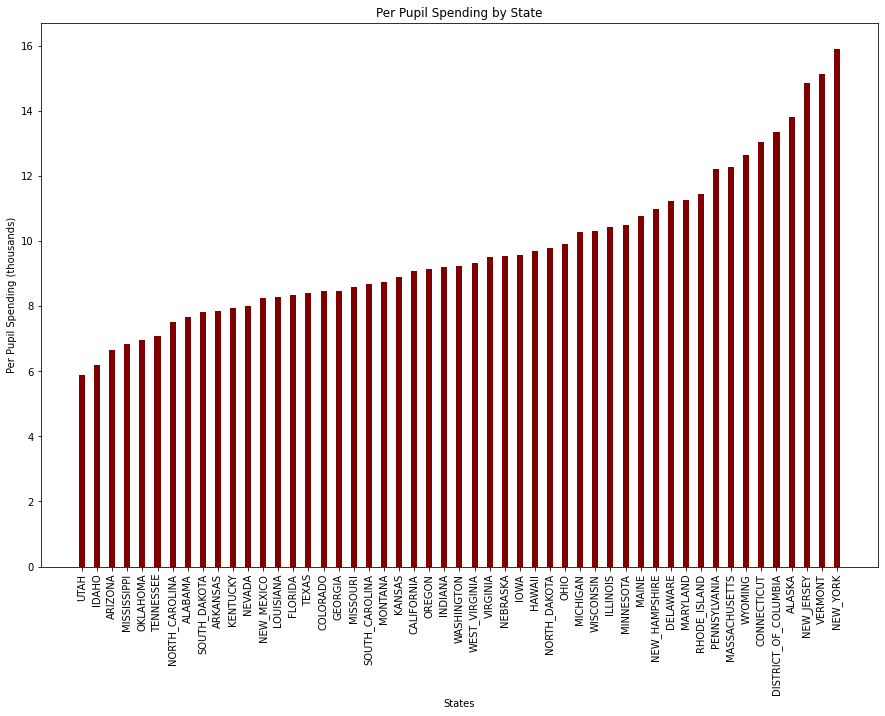

In [ ]:
from google.colab import files
#select state and per pupil spending to new dataframe
states_pupil = df[["STATE", "PER_PUPIL"]]
#group by state
grouped = states_pupil.groupby("STATE")
#average per pupil spending for each state
per_avg = grouped.mean()
#add column of states back into the grouped dataframe (the states were the indexes)
per_avg["State"] = per_avg.index
#sort from least to greatest per pupil spending
per_sorted = per_avg.sort_values('PER_PUPIL')
final = per_sorted.set_index("State")

#drop states Dodea and National (not actual US states)
final = final.drop(["DODEA", "NATIONAL"])
final["St"] = final.index
import matplotlib.pyplot as plt

# creating the list of values
x = final["St"].tolist()
y = final["PER_PUPIL"].tolist()

#set figure size
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
#rotate to make state names legible
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Per Pupil Spending (thousands)")
plt.title("Per Pupil Spending by State")

#uncomment to download the plot to drive
#plt.savefig('PerState.png', bbox_inches = 'tight')

plt.show()

New York, Vermont, and New Jersey have spent the most money per pupil on average. Utah, Idaho, and Arizona have spent on average the least money per pupil.

In addition to this, we visualized how Instruction_Expenditure varied with different states. We plotted a bar chart of how grade 4 scores varies from one state to another. Below shows the plots we obtained for each case.  

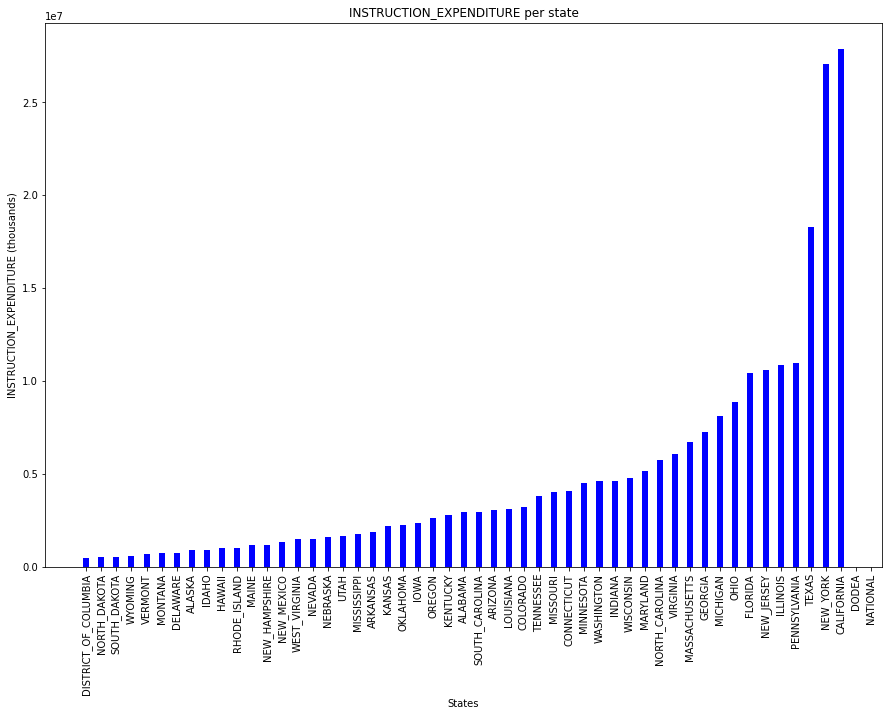

In [ ]:
states_revenue = df[["STATE", "INSTRUCTION_EXPENDITURE"]]
#group by state
grouped = states_revenue.groupby("STATE")
#average INstruction_Expenditure for each state
per_avg = grouped.mean()
#add column of states back into the grouped dataframe (the states were the indexes)
per_avg["STATE"] = per_avg.index
#sort from least to greatest per Instruction_Expenditure
per_sorted = per_avg.sort_values('INSTRUCTION_EXPENDITURE')

x = per_sorted["STATE"].tolist()
y = per_sorted["INSTRUCTION_EXPENDITURE"].tolist()
5
fig = plt.figure(figsize = (15,10 ))
plt.bar(x,y , color ='blue',
        width = 0.4)
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("INSTRUCTION_EXPENDITURE (thousands)")
plt.title("INSTRUCTION_EXPENDITURE per state")
df.sort_values('INSTRUCTION_EXPENDITURE',inplace=True)
plt.show()

We also looked at instruction expenditure per student by state. 

In [ ]:
# divide instruction expenditure by enrollment
df["INSTRUCTION_PER_PUPIL"] = df["INSTRUCTION_EXPENDITURE"]/df["A_A_A"]

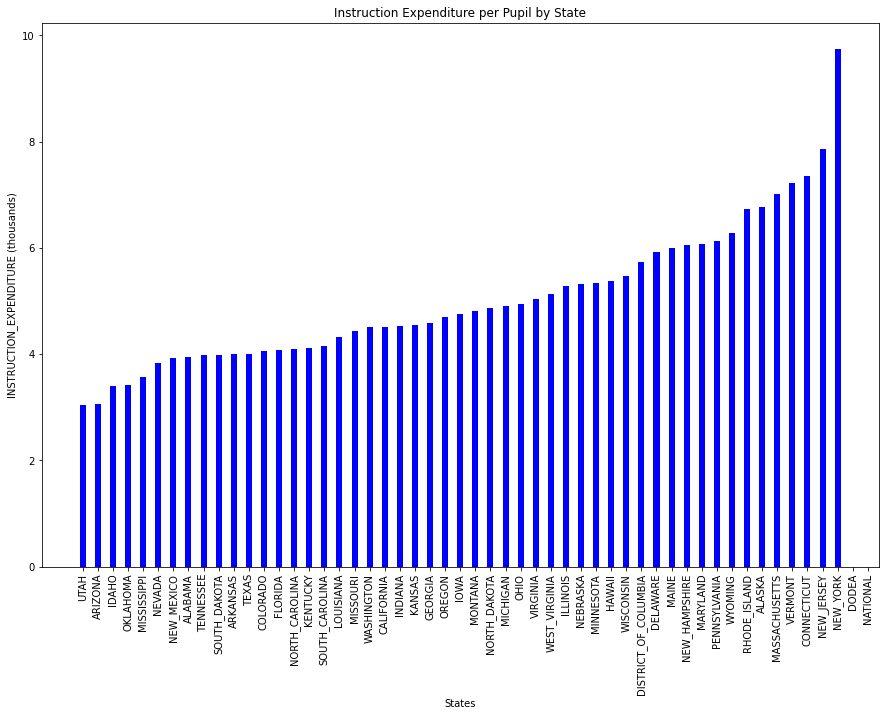

In [ ]:
import matplotlib.pyplot as plt
states_revenue = df[["STATE", "INSTRUCTION_PER_PUPIL"]]
#group by state
grouped = states_revenue.groupby("STATE")
#average INstruction_Expenditure for each state
per_avg = grouped.mean()
#add column of states back into the grouped dataframe (the states were the indexes)
per_avg["STATE"] = per_avg.index
#sort from least to greatest per Instruction_Expenditure
per_sorted = per_avg.sort_values('INSTRUCTION_PER_PUPIL')

x = per_sorted["STATE"].tolist()
y = per_sorted["INSTRUCTION_PER_PUPIL"].tolist()
5
fig = plt.figure(figsize = (15,10 ))
plt.bar(x,y , color ='blue',
        width = 0.4)
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("INSTRUCTION_EXPENDITURE (thousands)")
plt.title("Instruction Expenditure per Pupil by State")
df.sort_values('INSTRUCTION_PER_PUPIL',inplace=True)
plt.show()

Again, we see that New York, New Jersey, and Vermont are among the states with the highest spending on instruction expenditures per pupil.

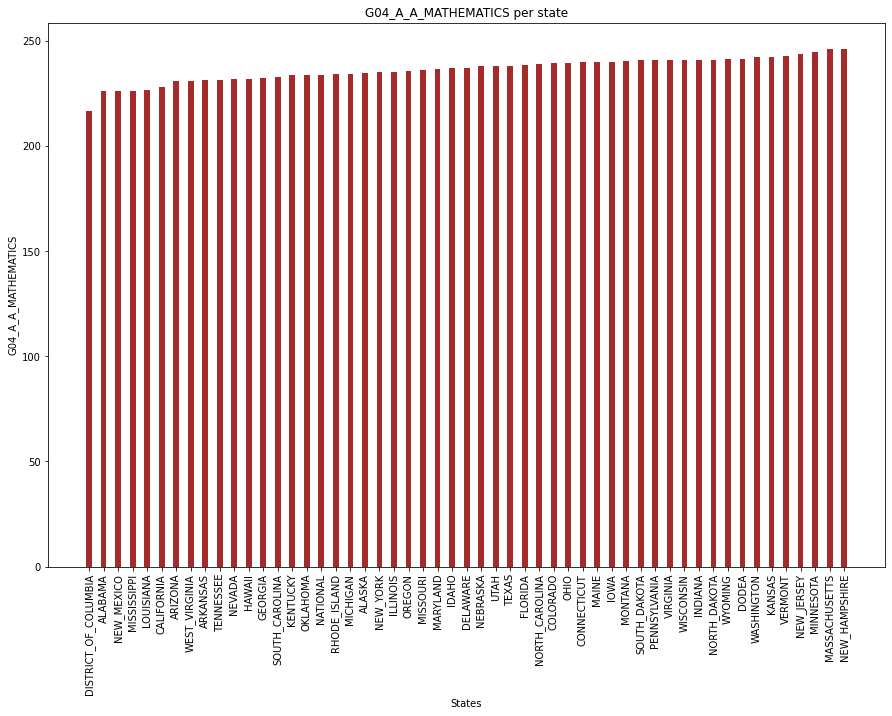

In [ ]:
states_revenue = df[["STATE", "G04_A_A_MATHEMATICS"]]
#group by state
grouped = states_revenue.groupby("STATE")
#average G04_A_A_MATHEMATICS for each state
per_avg = grouped.mean()
#add column of states back into the grouped dataframe (the states were the indexes)
per_avg["STATE"] = per_avg.index
#sort from least to greatest G04_A_A_MATHEMATICS
per_sorted = per_avg.sort_values('G04_A_A_MATHEMATICS')

x = per_sorted["STATE"].tolist()
y = per_sorted["G04_A_A_MATHEMATICS"].tolist()
5
fig = plt.figure(figsize = (15,10 ))
plt.bar(x,y , color ='brown',
        width = 0.4)
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("G04_A_A_MATHEMATICS")
plt.title("G04_A_A_MATHEMATICS per state")
df.sort_values('G04_A_A_MATHEMATICS',inplace=True)
plt.show()

From these plots, we can see that for some states, such as New Jersey, spending more on instruction expenses is related to higher grade 4 math scores. 

We will create two new data frames with expenditure and test score data for all students and one for white and Black students.

In [ ]:
#select columns of interest
outcome = df[["STATE", "TOTAL_EXPENDITURE", "A_A_A", "SUPPORT_SERVICES_EXPENDITURE", "INSTRUCTION_EXPENDITURE", 
            "G04_A_A_MATHEMATICS", "G08_A_A_MATHEMATICS"]]
race = df[["STATE", "TOTAL_EXPENDITURE", "A_A_A", "SUPPORT_SERVICES_EXPENDITURE", "INSTRUCTION_EXPENDITURE", 
           "G04_BL_A_READING", "G04_BL_A_MATHEMATICS", "G04_WH_A_READING", "G04_WH_A_MATHEMATICS"]]

After subsetting the data based on the attributes of interest, we dropped the rows with NA values. We are only able to analyze states that collect this data.

In [ ]:
#drop null values
outcome = outcome.dropna()
#drop null values
race = race.dropna()

Here we can see how many data points we have for each dataframe. The outcome dataset with all students average scores has more data than the datasets with race data, indicating that less states collect demographic data. 

In [ ]:
len(outcome)

439

In [ ]:
len(race)

131

Next, we created a column that quantified the total expenditure per pupil and the instruction expenditure per pupil.

In [ ]:
#create column with per pupil total expenditure data
outcome["PER_PUPIL"] = outcome["TOTAL_EXPENDITURE"]/outcome["A_A_A"]
race["PER_PUPIL"] = race["TOTAL_EXPENDITURE"]/race["A_A_A"]
#create column with per pupil instruction expenditure data
outcome["PER_PUPIL_INS"] = outcome["INSTRUCTION_EXPENDITURE"]/outcome["A_A_A"]
race["PER_PUPIL_INS"] = race["INSTRUCTION_EXPENDITURE"]/race["A_A_A"]

The next plots show per pupil total and instruction expenditure and various scores. There will be overall averages of all students as well as white and Black students. 

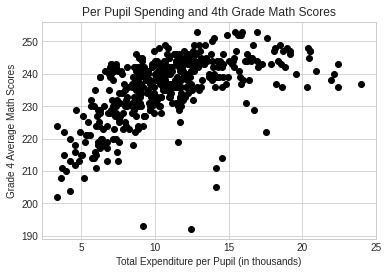

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#plot per pupil spending and 4th grade math scores
x = outcome["PER_PUPIL"]
y = outcome["G04_A_A_MATHEMATICS"]

#create plot
plt.plot(x, y, 'o', color='black', );
#label axes
plt.xlabel("Total Expenditure per Pupil (in thousands)")
plt.ylabel("Grade 4 Average Math Scores")
#title plot
plt.title("Per Pupil Spending and 4th Grade Math Scores")
#uncomment to save figure to the drive
#plt.savefig('PerPupil4thGradeMath.png', bbox_inches = 'tight')
plt.show()

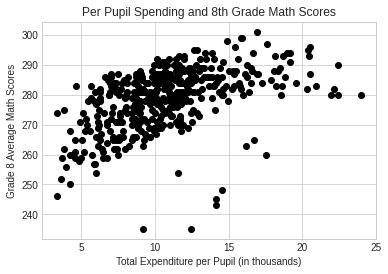

In [ ]:
#plot per pupil spending and 8th grade math scores
x = outcome["PER_PUPIL"]
y = outcome["G08_A_A_MATHEMATICS"]

#create plot
plt.plot(x, y, 'o', color='black');
#label axes
plt.xlabel("Total Expenditure per Pupil (in thousands)")
plt.ylabel("Grade 8 Average Math Scores")
#title plot
plt.title("Per Pupil Spending and 8th Grade Math Scores")
#plt.savefig('PerPupil8thGradeMath.png', bbox_inches = 'tight')
plt.show()

In [ ]:
column_1 = outcome["PER_PUPIL"]
column_2 = outcome["G04_A_A_MATHEMATICS"]
correlation = column_1.corr(column_2)
print(correlation)

0.5717756467723338


In [ ]:
column_1 = outcome["PER_PUPIL"]
column_2 = outcome["G08_A_A_MATHEMATICS"]
correlation = column_1.corr(column_2)
print(correlation)

0.4863349769329472


Here we see what looks to be a positive relationship between per pupil expenditure and average math scores for 4th and 8th graders. Math scores seem to be higher for 8th graders.

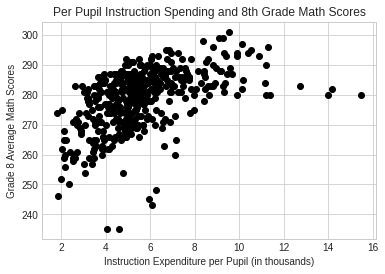

In [ ]:
#plot per pupil instruction spending and 8th grade math scores
x = outcome["PER_PUPIL_INS"]
y = outcome["G08_A_A_MATHEMATICS"]

#create plot
plt.plot(x, y, 'o', color='black');
#label axes
plt.xlabel("Instruction Expenditure per Pupil (in thousands)")
plt.ylabel("Grade 8 Average Math Scores")
#title plot
plt.title("Per Pupil Instruction Spending and 8th Grade Math Scores")
#uncomment to save figure to drive
#plt.savefig('PerPupilIns8thGradeMath.png', bbox_inches = 'tight')
plt.show()

In [ ]:
column_1 = outcome["PER_PUPIL_INS"]
column_2 = outcome["G08_A_A_MATHEMATICS"]
correlation = column_1.corr(column_2)
print(correlation)

0.5037864842887358


There also seems to be a positive relationship between per pupil instruction expenditure and 8th grade math scores.

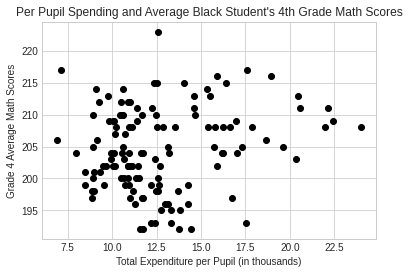

In [ ]:
#plot per pupil spending and 4th grade math scores for Black students
x = race["PER_PUPIL"]
y = race["G04_BL_A_READING"]

#create plot
plt.plot(x, y, 'o', color='black');
#label axes
plt.xlabel("Total Expenditure per Pupil (in thousands)")
plt.ylabel("Grade 4 Average Math Scores")
#title plot
plt.title("Per Pupil Spending and Average Black Student's 4th Grade Math Scores")
#uncomment to save figure to drive
#plt.savefig('PerPupil4thGradeMathBl.png', bbox_inches = 'tight')
plt.show()

In [ ]:
column_1 = race["PER_PUPIL"]
column_2 = race["G04_BL_A_READING"]
correlation = column_1.corr(column_2)
print(correlation)

0.17351657762238348


The relationship between per pupil spending and Black students 4th grade math scores is positive but not as strong as for all students on average. 

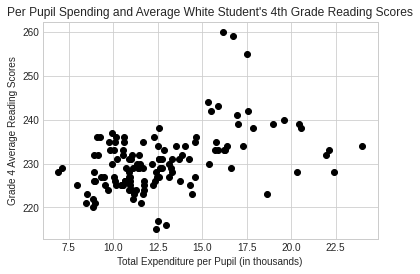

In [ ]:
#plot per pupil spending and 4th grade math scores for white students
x = race["PER_PUPIL"]
y = race["G04_WH_A_READING"]

#create plot
plt.plot(x, y, 'o', color='black');
#label axes
plt.xlabel("Total Expenditure per Pupil (in thousands)")
plt.ylabel("Grade 4 Average Reading Scores")
#title plot
plt.title("Per Pupil Spending and Average White Student's 4th Grade Reading Scores")
#uncomment to save figure to drive
#plt.savefig('PerPupil4thGradeReadWh.png', bbox_inches = 'tight')
plt.show()

In [ ]:
column_1 = race["PER_PUPIL"]
column_2 = race["G04_WH_A_READING"]
correlation = column_1.corr(column_2)
print(correlation)

0.4364495954630941


There is a positive relationship between white students 4th grade reading scores and per pupil spending. 

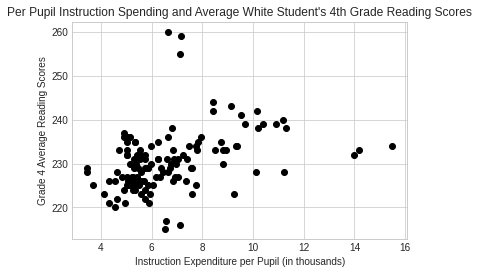

In [ ]:
#plot per pupil instruction spending and 4th grade math scores for white students
x = race["PER_PUPIL_INS"]
y = race["G04_WH_A_READING"]

#create plot
plt.plot(x, y, 'o', color='black');
#label axes
plt.xlabel("Instruction Expenditure per Pupil (in thousands)")
plt.ylabel("Grade 4 Average Reading Scores")
#title plot
plt.title("Per Pupil Instruction Spending and Average White Student's 4th Grade Reading Scores")

#uncomment to save figure to drive
#plt.savefig('PerPupilIns4thGradeReadingWh.png', bbox_inches = 'tight')
plt.show()

In [ ]:
column_1 = race["PER_PUPIL_INS"]
column_2 = race["G04_WH_A_READING"]
correlation = column_1.corr(column_2)
print(correlation)

0.36789620785133925


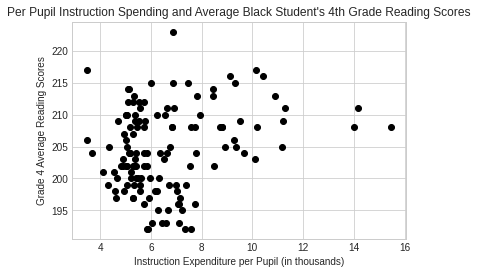

In [ ]:
#plot per pupil instruction spending and 4th grade math scores for Black students
x = race["PER_PUPIL_INS"]
y = race["G04_BL_A_READING"]

#create plot
plt.plot(x, y, 'o', color='black');
#label axes
plt.xlabel("Instruction Expenditure per Pupil (in thousands)")
plt.ylabel("Grade 4 Average Reading Scores")
#title plot
plt.title("Per Pupil Instruction Spending and Average Black Student's 4th Grade Reading Scores")
#uncomment to save figure to drive
#plt.savefig('PerPupil4thGradeReadingBl.png', bbox_inches = 'tight')
plt.show()

In [ ]:
column_1 = race["PER_PUPIL_INS"]
column_2 = race["G04_BL_A_READING"]
correlation = column_1.corr(column_2)
print(correlation)

0.23667267897485078


There is a positive relationship between both white and Black students 4th grade reading scores and per pupil instruction expenditure.

We notices a difference in these plots in the average scores of white and Black students so here we conducted a t-test to further explore the averages of white and Black students reading scores.

In [ ]:
# Student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from numpy import mean

data1 = race["G04_WH_A_READING"]
data2 = race["G04_BL_A_READING"]
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')
 
print("Average reading score for white students:", mean(data1))
print("Average reading score for Black students:", mean(data2)) 

Statistics=30.923, p=0.000
Different distributions (reject H0)
Average reading score for white students: 230.3740458015267
Average reading score for Black students: 204.51908396946564


Here we see that Black students average 4th grade reading score is significantly lower that white students average score. White students on average score 230.37 while Black students score 204.52 on average. 

### Case Study: Indiana

---



Next, we wanted to further explore Indiana's test scores in order to see if their policy change may impact scores. In 2008, the state of Indiana passed a bill that would set tax rates and ceilings on local local property taxes for education. They then increased state sales and use taxes in order to make up for this loss in local tax revenue.

In [ ]:
#filter for only Indiana data
indiana = df[df["STATE"] == "INDIANA"]

Here again we wanted to look at what variables had the least missing values in order to get as much data as possible.

In [ ]:
column_with_nan = indiana.columns[indiana.isnull().any()]
indiana.shape
(1460, 81)
for column in column_with_nan:
  print(column, indiana[column].isnull().sum())

ENROLL 9
TOTAL_REVENUE 8
FEDERAL_REVENUE 8
STATE_REVENUE 8
LOCAL_REVENUE 8
TOTAL_EXPENDITURE 8
INSTRUCTION_EXPENDITURE 8
SUPPORT_SERVICES_EXPENDITURE 8
OTHER_EXPENDITURE 9
CAPITAL_OUTLAY_EXPENDITURE 8
A_A_A 1
G01_A_A 1
G02_A_A 1
G03_A_A 1
G04_A_A 1
G05_A_A 1
G06_A_A 1
G07_A_A 1
G08_A_A 1
G09_A_A 1
G10_A_A 1
G11_A_A 1
G12_A_A 1
KG_A_A 1
PK_A_A 1
G01-G08_A_A 13
G09-G12_A_A 12
G01_AM_F 25
G01_AM_M 25
G01_AS_F 25
G01_AS_M 25
G01_BL_F 25
G01_BL_M 25
G01_HI_F 25
G01_HI_M 25
G01_HP_F 26
G01_HP_M 26
G01_TR_F 26
G01_TR_M 26
G01_WH_F 25
G01_WH_M 25
G02_AM_F 25
G02_AM_M 25
G02_AS_F 25
G02_AS_M 25
G02_BL_F 25
G02_BL_M 25
G02_HI_F 25
G02_HI_M 25
G02_HP_F 26
G02_HP_M 26
G02_TR_F 26
G02_TR_M 26
G02_WH_F 25
G02_WH_M 25
G03_AM_F 25
G03_AM_M 25
G03_AS_F 25
G03_AS_M 25
G03_BL_F 25
G03_BL_M 25
G03_HI_F 25
G03_HI_M 25
G03_HP_F 26
G03_HP_M 26
G03_TR_F 26
G03_TR_M 26
G03_WH_F 25
G03_WH_M 25
G04_AM_F 25
G04_AM_M 25
G04_AS_F 25
G04_AS_M 25
G04_BL_F 25
G04_BL_M 25
G04_HI_F 25
G04_HI_M 25
G04_HP_F 26
G04_HP_M 26

Grade 4 math scores for all students had the least missing values of the scores data so we will use this indicator.

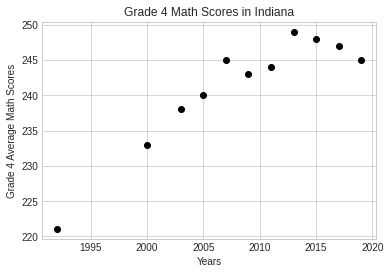

In [ ]:
#plot math scores over time in Indiana
x = indiana["YEAR"]
y = indiana["G04_A_A_MATHEMATICS"]

plt.plot(x, y, 'o', color='black');
#label axes
plt.xlabel("Years")
plt.ylabel("Grade 4 Average Math Scores")
#title plot
plt.title("Grade 4 Math Scores in Indiana")
#uncomment to save figure to drive
plt.savefig('IndianaMathScores.png', bbox_inches = 'tight')
#plt.show()

 Here we can see an increase in test scores after 2008, so Indiana's changed tax policy may be a potential solution. This type of policy works to eliminate disparities in revenue within each school district. 

### Case Study: Alaska vs. Nevada

---



Some states have more funding disparities than others. Alaska allocates the highest percentage of funding to districts with the highest poverty levels, while Nevada's low poverty districts receive more funding than their high poverty districts (Leins 2020). These differences in fundings and expenditures could impact the average scores of students in these states. Since we don't have socioeconomic class data, we use race to look at potential differences. As we know from background research, Black students are more likely to attend low povery schools. 

In [ ]:
#create dataframes of only Alaska and Nevada
alaska = df[df["STATE"] == "ALASKA"]
nev = df[df["STATE"] == "NEVADA"]

Here we look again at missing values to select the test scores for each state that have the least missing values. 

In [ ]:
#find columns with any null values
column_with_nan = nev.columns[nev.isnull().any()]
df.shape
(1460, 81)
#print each column with total null values
for column in column_with_nan:
  print(column, nev[column].isnull().sum())

ENROLL 9
TOTAL_REVENUE 8
FEDERAL_REVENUE 8
STATE_REVENUE 8
LOCAL_REVENUE 8
TOTAL_EXPENDITURE 8
INSTRUCTION_EXPENDITURE 8
SUPPORT_SERVICES_EXPENDITURE 8
OTHER_EXPENDITURE 9
CAPITAL_OUTLAY_EXPENDITURE 8
A_A_A 1
G01_A_A 1
G02_A_A 1
G03_A_A 1
G04_A_A 1
G05_A_A 1
G06_A_A 1
G07_A_A 1
G08_A_A 1
G09_A_A 1
G10_A_A 1
G11_A_A 1
G12_A_A 1
KG_A_A 1
PK_A_A 5
G01-G08_A_A 13
G09-G12_A_A 12
G01_AM_F 25
G01_AM_M 25
G01_AS_F 25
G01_AS_M 25
G01_BL_F 25
G01_BL_M 25
G01_HI_F 25
G01_HI_M 25
G01_HP_F 26
G01_HP_M 26
G01_TR_F 26
G01_TR_M 26
G01_WH_F 25
G01_WH_M 25
G02_AM_F 25
G02_AM_M 25
G02_AS_F 25
G02_AS_M 25
G02_BL_F 25
G02_BL_M 25
G02_HI_F 25
G02_HI_M 25
G02_HP_F 26
G02_HP_M 26
G02_TR_F 26
G02_TR_M 26
G02_WH_F 25
G02_WH_M 25
G03_AM_F 25
G03_AM_M 25
G03_AS_F 25
G03_AS_M 25
G03_BL_F 25
G03_BL_M 25
G03_HI_F 25
G03_HI_M 25
G03_HP_F 26
G03_HP_M 26
G03_TR_F 26
G03_TR_M 26
G03_WH_F 25
G03_WH_M 25
G04_AM_F 25
G04_AM_M 25
G04_AS_F 25
G04_AS_M 25
G04_BL_F 25
G04_BL_M 25
G04_HI_F 25
G04_HI_M 25
G04_HP_F 26
G04_HP_M 26

In [ ]:
#find columns with any null values
column_with_nan = alaska.columns[alaska.isnull().any()]
df.shape
(1460, 81)
#print each column with total null values
for column in column_with_nan:
  print(column, alaska[column].isnull().sum())

ENROLL 9
TOTAL_REVENUE 8
FEDERAL_REVENUE 8
STATE_REVENUE 8
LOCAL_REVENUE 8
TOTAL_EXPENDITURE 8
INSTRUCTION_EXPENDITURE 8
SUPPORT_SERVICES_EXPENDITURE 8
OTHER_EXPENDITURE 9
CAPITAL_OUTLAY_EXPENDITURE 8
A_A_A 1
G01_A_A 1
G02_A_A 1
G03_A_A 1
G04_A_A 1
G05_A_A 1
G06_A_A 1
G07_A_A 1
G08_A_A 1
G09_A_A 1
G10_A_A 1
G11_A_A 1
G12_A_A 1
KG_A_A 1
PK_A_A 2
G01-G08_A_A 13
G09-G12_A_A 12
G01_AM_F 25
G01_AM_M 25
G01_AS_F 25
G01_AS_M 25
G01_BL_F 25
G01_BL_M 25
G01_HI_F 25
G01_HI_M 25
G01_HP_F 25
G01_HP_M 25
G01_TR_F 25
G01_TR_M 25
G01_WH_F 25
G01_WH_M 25
G02_AM_F 25
G02_AM_M 25
G02_AS_F 25
G02_AS_M 25
G02_BL_F 25
G02_BL_M 25
G02_HI_F 25
G02_HI_M 25
G02_HP_F 25
G02_HP_M 25
G02_TR_F 25
G02_TR_M 25
G02_WH_F 25
G02_WH_M 25
G03_AM_F 25
G03_AM_M 25
G03_AS_F 25
G03_AS_M 25
G03_BL_F 25
G03_BL_M 25
G03_HI_F 25
G03_HI_M 25
G03_HP_F 25
G03_HP_M 25
G03_TR_F 25
G03_TR_M 25
G03_WH_F 25
G03_WH_M 25
G04_AM_F 25
G04_AM_M 25
G04_AS_F 25
G04_AS_M 25
G04_BL_F 25
G04_BL_M 25
G04_HI_F 25
G04_HI_M 25
G04_HP_F 25
G04_HP_M 25

The grade 4 reading test scores with race have the least amount of null values so this indicator will be used. We will drop all missing values.

In [ ]:
nevtest = nev[["G04_BL_A_READING", "G04_WH_A_READING"]]
altest = alaska[["G04_BL_A_READING", "G04_WH_A_READING"]]
#drop all null values
nevtest = nevtest.dropna()
altest = altest.dropna()

In [ ]:
# Student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from numpy import mean

data1 = nevtest["G04_BL_A_READING"]
data2 = altest["G04_BL_A_READING"]
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')
 
print("Average reading score for Black students in Nevada:", mean(data1))
print("Average reading score for Black students in Alaska:", mean(data2)) 

Statistics=-3.209, p=0.015
Different distributions (reject H0)
Average reading score for Black students in Nevada: 201.4
Average reading score for Black students in Alaska: 207.5


The average reading score for Black students in Nevada is significantly less than in Alaska. This result may indicate that Alaska's more equitable funding (with higher poverty districts getting more money) may impact student outcomes (standardized test scores). 

In [ ]:
# Student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from numpy import mean

data1 = nevtest["G04_WH_A_READING"]
data2 = altest["G04_WH_A_READING"]
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')
 
print("Average math score for white students in Nevada:", mean(data1))
print("Average math score for white students in Alaska:", mean(data2)) 

Statistics=0.813, p=0.443
Same distributions (fail to reject H0)
Average math score for white students in Nevada: 226.8
Average math score for white students in Alaska: 225.5


White student's scores are not significantly different between Nevada and Alaska. This may be because Alaska's funding choices are more designed to improve underserved school districts. 

### Time Series Analyses

---



We loaded the R extension in python to allow us to access additional analysis features. 

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# download packages we need
install.packages(c("readr","ggplot2","dplyr","reshape2","MASS"))
library (readr)
library(ggplot2)
library(dplyr)
library(reshape2)
library(MASS)


In [ ]:
%%R
# download dataset from github
urlfile="https://raw.githubusercontent.com/carolineburns3/finalproject/main/states_all_extended.csv" # Make sure the url is the raw version of the file on GitHub

# save dataset as edu
edu <-read.csv(url(urlfile))
attach(edu)
# new column for region identity
REGION <- case_when(
    STATE %in% c("PENNSYLVANIA", "MAINE", "CONNECTICUT", "MASSACHUSETS","NEW_HAMPSHIRE","RHODE_ISLAND","VERMONT","NEW_JERSEY","NEW_YORK")  ~ "Northeast",
    STATE %in% c("ARKANSAS","ILLINOIS", "INDIANA", "MICHIGAN","OHIO","WISCONSIN","IOWA","KANSAS","MINNESOTA","MISSOURI","NEBRASKA","NORTH_DAKOTA","SOUTH_DAKOTA") ~ "Midwest",
    STATE %in% c("DELAWARE", "FLORIDA", "GEORGIA","MARYLAND","NORTH_CAROLINA","SOUTH_CAROLINA","VIRGINIA","DISTRICT_OF_COLUMBIA","WEST_VIRGINIA","ALABAMA","KENTUCKY","MISSISSIPPI","TENNESSEE") ~ "South",
    STATE %in% c("ARIZONA", "COLORADO", "IDAHO","MONTANA","NEVADA","NEW_MEXICO","UTAH","WYOMING","CALIFORNIA","ALASKA","HAWAII","OREGON","WASHINGTON") ~ "West",
)

# add new columns to dataset
edu_categories <- cbind(edu, REGION)

attach(edu_categories)

Subset the data into states and then into regions.

In [ ]:
%%R
#subset states
al <-subset(edu, STATE=="ALABAMA")
ak <- subset(edu, STATE=="ALASKA")
az <- subset(edu, STATE=="ARIZONA")
ar <- subset(edu, STATE=="ARKANSAS")
ca <- subset(edu, STATE=="CALIFORNIA")
co <- subset(edu, STATE=="COLORADO")
ct <- subset(edu, STATE=="CONNECTICUT")
de <- subset(edu, STATE=="DELAWARE")
dc <- subset(edu, STATE=="DISTRICT_OF_COLUMBIA")
fl <- subset(edu, STATE=="FLORIDA")
ga <- subset(edu, STATE=="GEORGIA")
hi <- subset(edu, STATE=="HAWAII")
id <- subset(edu, STATE=="IDAHO")
il <- subset(edu, STATE=="ILLINOIS")
ind <- subset(edu, STATE=="INDIANA")
ia <- subset(edu, STATE=="IOWA")
ks <- subset(edu, STATE=="KANSAS")
ky <- subset(edu, STATE=="KENTUCKY")
la <- subset(edu, STATE=="LOUISIANA")
me <- subset(edu, STATE=="MAINE")
md <- subset(edu, STATE=="MARYLAND")
ma <- subset(edu, STATE=="MASSACHUSETTS")
mi <- subset(edu, STATE=="MICHIGAN")
mn <- subset(edu, STATE=="MINNESOTA")
ms <- subset(edu, STATE=="MISSISSIPPI")
mo <- subset(edu, STATE=="MISSOURI")
mt <- subset(edu, STATE=="MONTANA")
ne <- subset(edu, STATE=="NEBRASKA")
nv <- subset(edu, STATE=="NEVADA")
nh <- subset(edu, STATE=="NEW_HAMPSHIRE")
nj <- subset(edu, STATE=="NEW_JERSEY")
nm <- subset(edu, STATE=="NEW_MEXICO")
ny <- subset(edu, STATE=="NEW_YORK")
nc <- subset(edu, STATE=="NORTH_CAROLINA")
nd <- subset(edu, STATE=="NORTH_DAKOTA")
oh <- subset(edu, STATE=="OHIO")
ok <- subset(edu, STATE=="OKLAHOMA")
or <- subset(edu, STATE=="OREGON")
pa <- subset(edu, STATE=="PENNSYLVANIA")
ri <- subset(edu, STATE=="RHODE_ISLAND")
sc <- subset(edu, STATE=="SOUTH_CAROLINA")
sd <- subset(edu, STATE=="SOUTH_DAKOTA")
tn <- subset(edu, STATE=="TENNESSEE")
tx <- subset(edu, STATE=="TEXAS")
ut <- subset(edu, STATE=="UTAH")
vt <- subset(edu, STATE=="VERMONT")
va <- subset(edu, STATE=="VIRGINIA")
wa <- subset(edu, STATE=="WASHINGTON")
wv <- subset(edu, STATE=="WEST_VIRGINIA")
wi <- subset(edu, STATE=="WISCONSIN")
wy <- subset(edu, STATE=="WYOMING")

# subset by region
northeast <- rbind(pa,me,ct,ma,nh,ri,vt,nj,ny)
midwest <- rbind(il,ind,mi,oh,wi,ia,ks,mn,mo,ne,nd,sd)
south <- rbind(de,fl,ga,md,nc,sc,va,dc,wv,al,ky,ms,tn)
west <- rbind(az,co,id,mt,nv,nm,ut,wy,ca,ak,hi,or,wa)

We looked at a plot of total expenditure overtime for all of the states. We had to omit 440 rows of data due to null values.

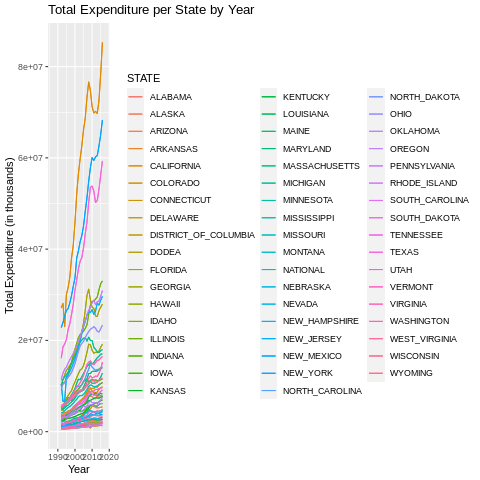

In [ ]:
%%R
# create a plot looking at each state's revenue over time
all_states_plot <- ggplot(data=edu, aes(x=YEAR, y=TOTAL_EXPENDITURE, group = STATE,
                                            color = STATE)) + geom_line() +labs(y= "Total Expenditure (in thousands)", x = "Year")

all_states_plot + ggtitle("Total Expenditure per State by Year")+geom_line()


Since looking at all states at once doesn't give us a clear visual, we broke down this plot into regions. First we looked at northeastern states. For all of the following plots, we dropped the rows with null data.

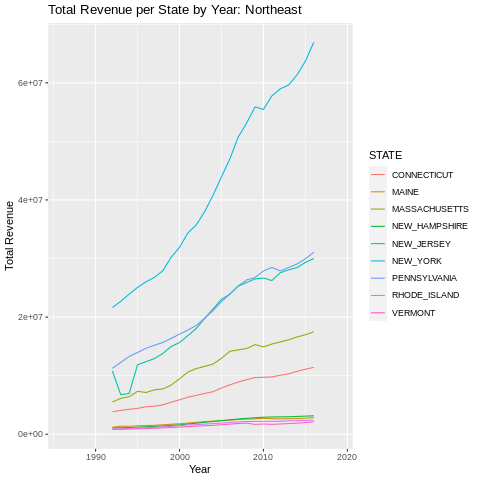

In [ ]:
%%R
# create line plot for northeastern revenue over time
northeast_plot <- ggplot(data=northeast, aes(x=YEAR, y=TOTAL_REVENUE, group = STATE,
                                        color = STATE))
northeast_plot + ggtitle("Total Revenue per State by Year: Northeast")+geom_line() +labs(y= "Total Revenue", x = "Year")


We can see that New York has a higher revenue than the other states, and it was increasing going into 2019. Overall, revenue appears to be increasing or staying relatively the same. 

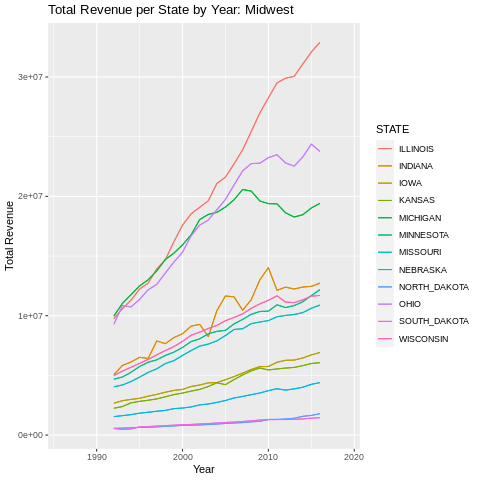

In [ ]:
%%R
# create plot of midwest revenue over time
midwest_plot <- ggplot(data=midwest, aes(x=YEAR, y=TOTAL_REVENUE, group = STATE,
                                             color = STATE))
midwest_plot+ geom_line() +labs(y= "Total Revenue", x = "Year") + ggtitle("Total Revenue per State by Year: Midwest")+geom_line()


The midwestern plot shows that revenue is generally increasing for each state, however, some states experience more dips, such as Indiana, Ohio, and Michigan. Illinois is increasing at faster rate than the other states. 

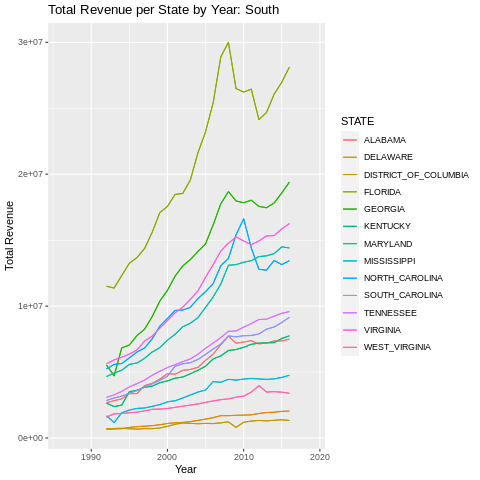

In [ ]:
%%R
# create a plot of southern state revenues over time
south_plot <- ggplot(data=south, aes(x=YEAR, y=TOTAL_REVENUE, group = STATE,
                                             color = STATE))
south_plot+ geom_line() +labs(y= "Total Revenue", x = "Year") + ggtitle("Total Revenue per State by Year: South")+geom_line()


An interesting feature to this plot is the dip in revenue between years 2008 and 2011 for Florida, Georgia, Virgina, North Carolina, and Alabama. This could be partly explained by the Great Recession in 2008, as it led to lower tax revenue. 

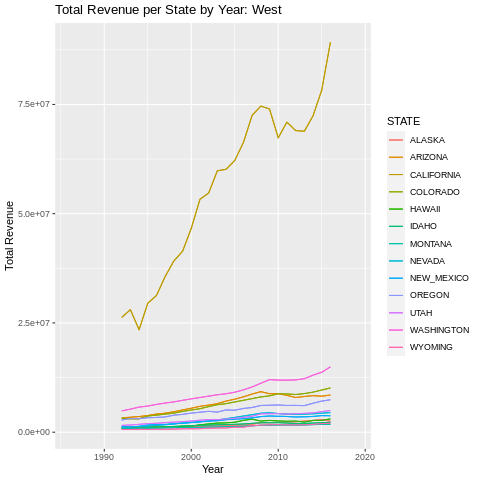

In [ ]:
%%R
# create line plot for western states' revenue over time
west_plot <- ggplot(data=west, aes(x=YEAR, y=TOTAL_REVENUE, group = STATE,
                                     color = STATE))
west_plot+ geom_line() +labs(y= "Total Revenue", x = "Year") + ggtitle("Total Revenue per State by Year: West")+geom_line() # could add geom_point()


California, similar to New York, has a much higher revenue compared to other states in the region. While we can see a clear dip around 2008, there is evidently a major rebound going into 2019. The other states show marginally increasing trends. 

Next we looked at expenditure per student in each state over time.

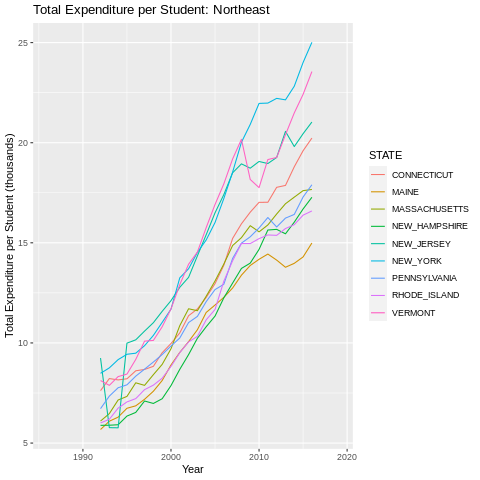

In [ ]:
%%R
# divide total expenditure by enrollment
EXPENDITURE_PER_STUDENT_NE <- northeast$TOTAL_EXPENDITURE/northeast$A_A_A
# plot expenditure per student over time
northeast_plot3 <- ggplot(data=northeast, aes(x=YEAR, y=EXPENDITURE_PER_STUDENT_NE, group = STATE,
                                              color = STATE)) + ggtitle("Total Expenditure per Student: Northeast")+geom_line() +labs(y= "Total Expenditure per Student (thousands)", x = "Year")
northeast_plot3


Overall, the amount of spending per student has increased over time, however, it hasn't been a consistent increase. Again, we can see that New York is setting the upper bound of spending, but the range between states is not as spreadout. 

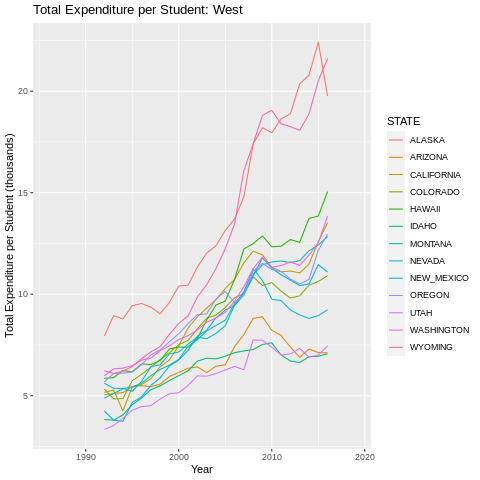

In [ ]:
%%R
# divide expenditure by enrollment
EXPENDITURE_PER_STUDENT_W <- west$TOTAL_EXPENDITURE/west$A_A_A
# plot expenditure per student over time
west_plot3 <- ggplot(data=west, aes(x=YEAR, y=EXPENDITURE_PER_STUDENT_W, group = STATE,
                                              color = STATE)) + ggtitle("Total Expenditure per Student: West")+geom_line() +labs(y= "Total Expenditure per Student (thousands)", x = "Year")
west_plot3

This plot shows more dips in spending, especially around the year 2008, which coincides with the Great Recession. Interestingly, spending continues to decrease in Alaska after hitting the highest peak of Western states. 

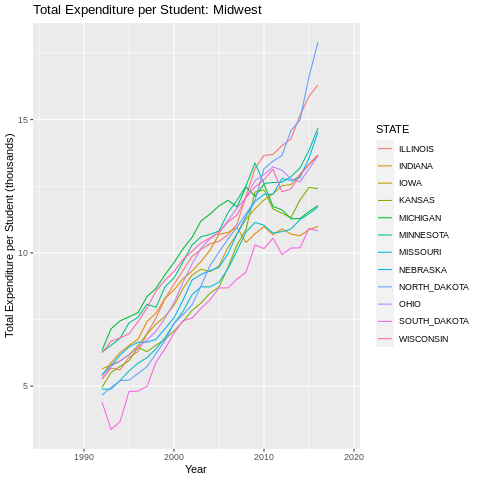

In [ ]:
%%R
# divide expenditure by enrollment
EXPENDITURE_PER_STUDENT_M <- midwest$TOTAL_EXPENDITURE/midwest$A_A_A
# plot expenditure per student over time
midwest_plot3 <- ggplot(data=midwest, aes(x=YEAR, y=EXPENDITURE_PER_STUDENT_M, group = STATE,
                                    color = STATE)) + ggtitle("Total Expenditure per Student: Midwest")+geom_line() +labs(y= "Total Expenditure per Student (thousands)", x = "Year")
midwest_plot3


Spending in the midwest is pretty similar among states. We can see that the states that spend the most (North Dakota, Illinois) are still increasing into 2019.

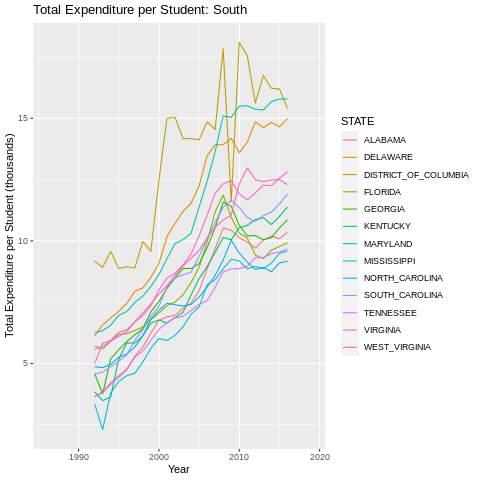

In [ ]:
%%R
# divide expenditure by enrollment
EXPENDITURE_PER_STUDENT_S <- south$TOTAL_EXPENDITURE/south$A_A_A
# plot expenditure per student over time
south_plot3 <- ggplot(data=south, aes(x=YEAR, y=EXPENDITURE_PER_STUDENT_S, group = STATE,
                                          color = STATE)) + ggtitle("Total Expenditure per Student: South")+geom_line() +labs(y= "Total Expenditure per Student (thousands)", x = "Year")
south_plot3

Two striking features of this plot are the major dip in expenditure in D.C. followed by a large increase, and the large increase in expenditure in Marlyand prior to 2010. It is surprising that Maryland did not show the same dip in expenditure that the majority of other states in this region did around 2008.

### Analyzing Regional Expenditures

---



After noticing differences in spending trends between states, we next examined how spending (1) affected test scores and (2) how this differed between regions. 

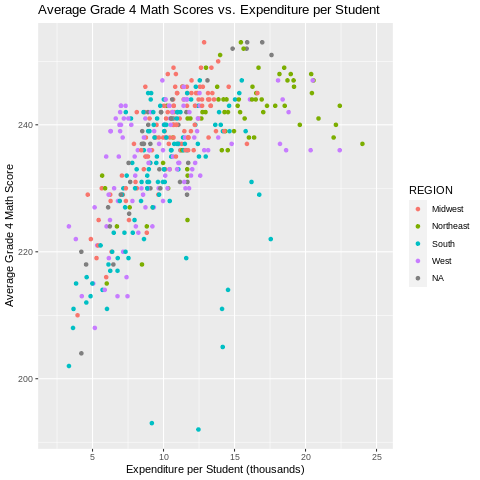

In [ ]:
%%R
# create scatterplots of how expenditure per student affects tests scores in each region
expend_per_student_total <- TOTAL_EXPENDITURE/A_A_A
math_4_scatter <- ggplot(edu_categories, aes(x=expend_per_student_total, y=G04_A_A_MATHEMATICS, color = REGION)) + geom_point()+ ggtitle("Average Grade 4 Math Scores vs. Expenditure per Student") + labs(x="Expenditure per Student (thousands)", y= "Average Grade 4 Math Score")
math_4_scatter


We can see that the Northeast seems to spend more overall compared to other regions and also has some of the highest test scores. Notably, there are numerous outliers in the South that show high spending but relatively low scores. 

Note: NA refers to territories Dodea and National

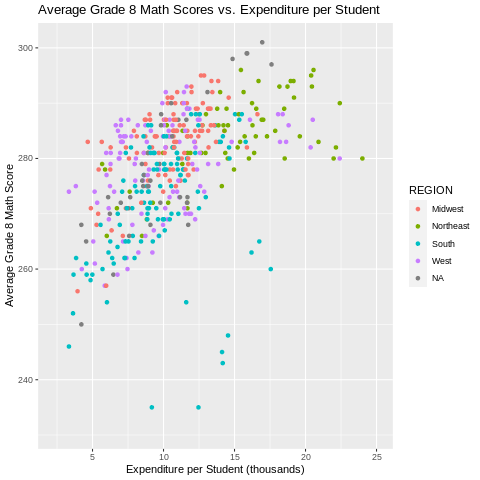

In [ ]:
%%R
math_8_scatter <- ggplot(edu_categories, aes(x=expend_per_student_total, y=G08_A_A_MATHEMATICS, color = REGION)) + geom_point()+ ggtitle("Average Grade 8 Math Scores vs. Expenditure per Student") + labs(x="Expenditure per Student (thousands)", y= "Average Grade 8 Math Score")
math_8_scatter

We can see the same trend as in the plot above. 

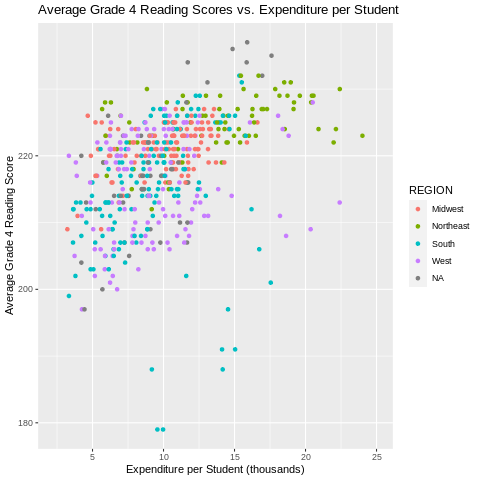

In [ ]:
%%R
reading_4_scatter <- ggplot(edu_categories, aes(x=expend_per_student_total, y=G04_A_A_READING, color = REGION)) + geom_point()+ ggtitle("Average Grade 4 Reading Scores vs. Expenditure per Student") + labs(x="Expenditure per Student (thousands)", y= "Average Grade 4 Reading Score")
reading_4_scatter

There are more outliers coming from the West region in this plot and again from the South. 

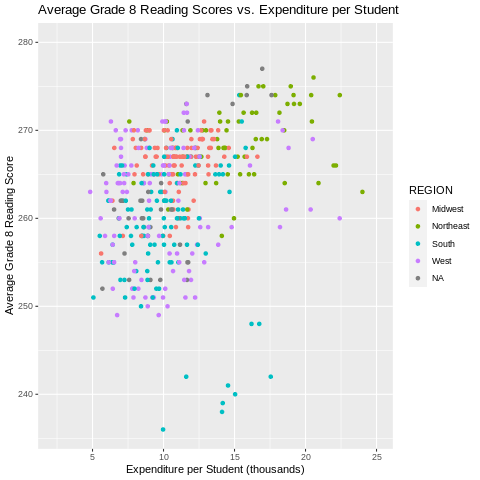

In [ ]:
%%R
reading_8_scatter <- ggplot(edu_categories, aes(x=expend_per_student_total, y=G08_A_A_READING, color = REGION)) + geom_point()+ ggtitle("Average Grade 8 Reading Scores vs. Expenditure per Student") + labs(x="Expenditure per Student (thousands)", y= "Average Grade 8 Reading Score")
reading_8_scatter

These four plot shows that the Northeast appears to have the highest test scores as well as the highest expenditure per student. The outliers at the bottom of the plot, which are associated with the south, are interesting to note, since the test scores are very low but the expenditure per student is relatively high.  

We conducted a one-way ANOVA to see if expenditure per student and test scores significantly differed by region. 

In [ ]:
%%R
# anova of expenditure per student explained by region
mod_region_expend <- aov(expend_per_student_total~REGION)
anova(mod_region_expend)

Analysis of Variance Table

Response: expend_per_student_total
            Df  Sum Sq Mean Sq F value    Pr(>F)    
REGION       3  2606.5  868.83  72.319 < 2.2e-16 ***
Residuals 1171 14068.2   12.01                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Since the results of the ANOVA were significant, we used Tukey's HSD to look at pairwise comparisons. 

In [ ]:
%%R
TukeyHSD(mod_region_expend)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = expend_per_student_total ~ REGION)

$REGION
                        diff        lwr        upr     p adj
Northeast-Midwest  3.6065524  2.8051378  4.4079670 0.0000000
South-Midwest     -0.4248370 -1.1243691  0.2746950 0.4006451
West-Midwest      -0.5279884 -1.2275205  0.1715436 0.2111717
South-Northeast   -4.0313894 -4.8328040 -3.2299748 0.0000000
West-Northeast    -4.1345408 -4.9359554 -3.3331262 0.0000000
West-South        -0.1031514 -0.8026834  0.5963806 0.9814047



The results of post-hoc test shows that the Northeastern states spend significantly more per student than the Midwestern states, Southern states, and Western states. All of the other regions do not significantly differ in spending. 

In [ ]:
%%R
# anova of grade 4 math scores explained by region
mod_region_math4 <-aov(G04_A_A_MATHEMATICS~REGION)
anova(mod_region_math4)

Analysis of Variance Table

Response: G04_A_A_MATHEMATICS
           Df Sum Sq Mean Sq F value  Pr(>F)    
REGION      3   4538 1512.77  19.928 3.3e-12 ***
Residuals 494  37500   75.91                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Since the results of the ANOVA were significant, we performed a post-hoc test. 

In [ ]:
%%R
TukeyHSD(mod_region_math4)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = G04_A_A_MATHEMATICS ~ REGION)

$REGION
                       diff          lwr       upr     p adj
Northeast-Midwest  1.350932  -1.75719482  4.459058 0.6770946
South-Midwest     -6.452513  -9.14190682 -3.763119 0.0000000
West-Midwest      -3.823671  -6.54246536 -1.104878 0.0018048
South-Northeast   -7.803445 -10.89903485 -4.707855 0.0000000
West-Northeast    -5.174603  -8.29576951 -2.053437 0.0001353
West-South         2.628842  -0.07561168  5.333295 0.0602473



The results of the post-hoc test show that the Northeastern states had significantly higher scores than the South and the West, and the Midwest had significantly higher scores than the South and the West. 

In [ ]:
%%R
# anova of grade 8 math scores explained by region
mod_region_math8 <-aov(G08_A_A_MATHEMATICS~REGION)
anova(mod_region_math4)

Analysis of Variance Table

Response: G04_A_A_MATHEMATICS
           Df Sum Sq Mean Sq F value  Pr(>F)    
REGION      3   4538 1512.77  19.928 3.3e-12 ***
Residuals 494  37500   75.91                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Since the results of the ANOVA were significant, we performed a post-hoc test. 

In [ ]:
%%R
TukeyHSD(mod_region_math8)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = G08_A_A_MATHEMATICS ~ REGION)

$REGION
                         diff        lwr       upr     p adj
Northeast-Midwest   0.3938776  -2.781488  3.569243 0.9886912
South-Midwest     -10.5047979 -13.253707 -7.755889 0.0000000
West-Midwest       -4.3269558  -7.108628 -1.545283 0.0004049
South-Northeast   -10.8986755 -14.058029 -7.739322 0.0000000
West-Northeast     -4.7208333  -7.908735 -1.532932 0.0008694
West-South          6.1778422   3.414461  8.941223 0.0000001



The results show that Northeastern states have significantly higher test scores than Southern and Western states, and that the Midwest has signficantly higher test scores than Southern and Western states. 

In [ ]:
%%R
# anova of grade 4 reading scores explained by region
mod_region_reading4 <-aov(G04_A_A_READING~REGION)
anova(mod_region_reading4)

Analysis of Variance Table

Response: G04_A_A_READING
           Df  Sum Sq Mean Sq F value    Pr(>F)    
REGION      3  6910.6 2303.52    51.8 < 2.2e-16 ***
Residuals 570 25347.5   44.47                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
TukeyHSD(mod_region_reading4)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = G04_A_A_READING ~ REGION)

$REGION
                        diff        lwr       upr     p adj
Northeast-Midwest  3.4411286   1.208208  5.674049 0.0004681
South-Midwest     -5.5076300  -7.428370 -3.586890 0.0000000
West-Midwest      -5.0475709  -7.005841 -3.089301 0.0000000
South-Northeast   -8.9487586 -11.137492 -6.760025 0.0000000
West-Northeast    -8.4886994 -10.710440 -6.266959 0.0000000
West-South         0.4600592  -1.447672  2.367791 0.9252321



The results of the post hoc test show that the Northeast has significantly higher scores than the Midwest, the South, and the West. The Midwest has significantly higher scores than the South and West. 

In [ ]:
%%R
# anova of grade 8 reading scores explained by region
mod_region_reading8 <-aov(G08_A_A_READING~REGION)
anova(mod_region_reading8)

Analysis of Variance Table

Response: G08_A_A_READING
           Df  Sum Sq Mean Sq F value    Pr(>F)    
REGION      3  5480.3 1826.77  58.827 < 2.2e-16 ***
Residuals 490 15216.1   31.05                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
TukeyHSD(mod_region_reading8)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = G08_A_A_READING ~ REGION)

$REGION
                       diff         lwr       upr     p adj
Northeast-Midwest  2.528893   0.5030590  4.554727 0.0074977
South-Midwest     -6.497203  -8.2380320 -4.756374 0.0000000
West-Midwest      -4.000498  -5.7532143 -2.247782 0.0000000
South-Northeast   -9.026096 -11.0159940 -7.036198 0.0000000
West-Northeast    -6.529391  -8.5296967 -4.529086 0.0000000
West-South         2.496705   0.7856509  4.207759 0.0010830



The results show that the Northeast has significantly higher scores than the Midwest, the South, and the West. The Midwest has significantly higher scores than the South and West. The West also has significantly higher scores than the South. 

From these tests, we can see a relationship between expenditure per student and test scores, such that higher spending tends to lead to higher test scores. 

# *Modeling and Evaluating*

### Regression Model

---



First we created a multivariate linear regression model that predicted grade 4 reading scores. We did this to see which variables are the most significant predictors of scores. We did not include variables pertaining to race because it limited the amount of data we could use by a large amount.   

In [ ]:
%%R
# create multivariate linear regression model 
mod_1 <- lm(G04_A_A_READING~STATE+expend_per_student_total+TOTAL_EXPENDITURE+TOTAL_REVENUE+
              STATE_REVENUE+LOCAL_REVENUE+INSTRUCTION_EXPENDITURE+ 
              SUPPORT_SERVICES_EXPENDITURE+A_A_A)
summary(mod_1)


Call:
lm(formula = G04_A_A_READING ~ STATE + expend_per_student_total + 
    TOTAL_EXPENDITURE + TOTAL_REVENUE + STATE_REVENUE + LOCAL_REVENUE + 
    INSTRUCTION_EXPENDITURE + SUPPORT_SERVICES_EXPENDITURE + 
    A_A_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7041  -1.6094   0.0114   1.7379  16.4972 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.016e+02  1.714e+00 117.609  < 2e-16 ***
STATEALASKA                  -4.095e+00  1.923e+00  -2.129 0.033739 *  
STATEARIZONA                 -3.742e+00  1.403e+00  -2.668 0.007908 ** 
STATEARKANSAS                 3.822e+00  1.406e+00   2.719 0.006803 ** 
STATECALIFORNIA              -4.190e+01  9.044e+00  -4.633 4.69e-06 ***
STATECOLORADO                 8.805e+00  1.403e+00   6.275 8.05e-10 ***
STATECONNECTICUT              1.228e+01  1.474e+00   8.332 9.04e-16 ***
STATEDELAWARE                 1.000e+01  1.728e+00   5.787 1.32e-08 ***
STATEDISTRICT

We can see that State, expenditure per student, instruction expenditure, support services expenditure, and enrollment are all significant predictors of grade 4 reading scores. We also have a pretty high R-squared value of .866. This means our predictors are explaining a lot of the variance in grade 4 reading scores. Since states may not collect sufficient data each year, we wanted to see if simplifying this model would still make it effective, so we ran a backwards stepwise regression on the model. 

In [ ]:
%%R
step(mod_1)

Start:  AIC=1243.17
G04_A_A_READING ~ STATE + expend_per_student_total + TOTAL_EXPENDITURE + 
    TOTAL_REVENUE + STATE_REVENUE + LOCAL_REVENUE + INSTRUCTION_EXPENDITURE + 
    SUPPORT_SERVICES_EXPENDITURE + A_A_A

                               Df Sum of Sq     RSS    AIC
- STATE_REVENUE                 1       8.0  4504.1 1242.1
- LOCAL_REVENUE                 1      10.9  4507.0 1242.4
- TOTAL_REVENUE                 1      11.5  4507.6 1242.5
<none>                                       4496.0 1243.2
- TOTAL_EXPENDITURE             1      19.2  4515.2 1243.4
- INSTRUCTION_EXPENDITURE       1      75.0  4571.1 1249.8
- A_A_A                         1      86.5  4582.6 1251.1
- SUPPORT_SERVICES_EXPENDITURE  1     185.5  4681.6 1262.3
- expend_per_student_total      1    1036.5  5532.5 1349.7
- STATE                        50   21621.8 26117.9 2063.3

Step:  AIC=1242.1
G04_A_A_READING ~ STATE + expend_per_student_total + TOTAL_EXPENDITURE + 
    TOTAL_REVENUE + LOCAL_REVENUE + INSTRUC

The backwards stepwise regression based on AIC criteria suggested that we should leave in the variables state, expenditure per student, total expenditure, total revenue, instruction expenditure, support services expenditure, and enrollment. Since we know that the variable expend_per_student_total was created by dividing total expenditure by enrollment, we decided we would take out the variables total expenditure and enrollment (A_A_A).

This means that our regression model would be:

*Grade 4 Reading Scores = State + Expenditure per Student + Total Revenue + Instruction Expenditure + Support Services Expenditure*

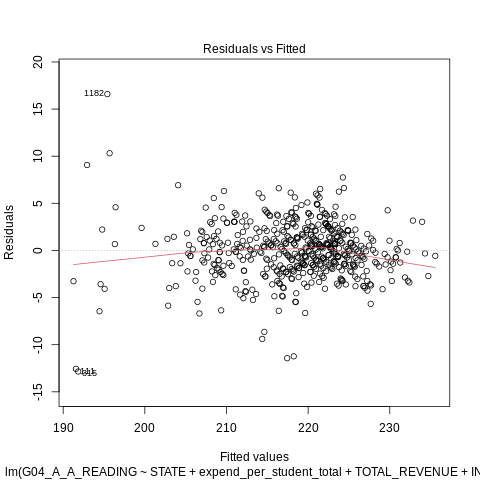

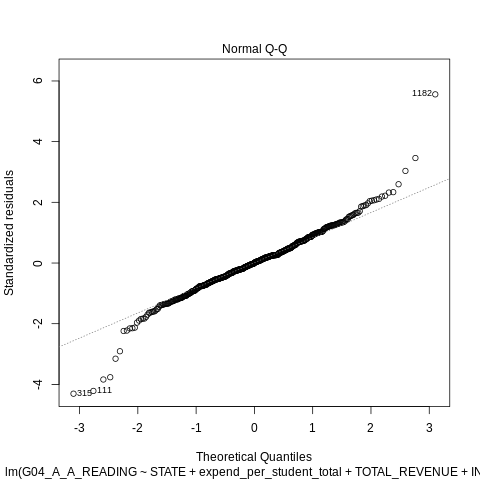

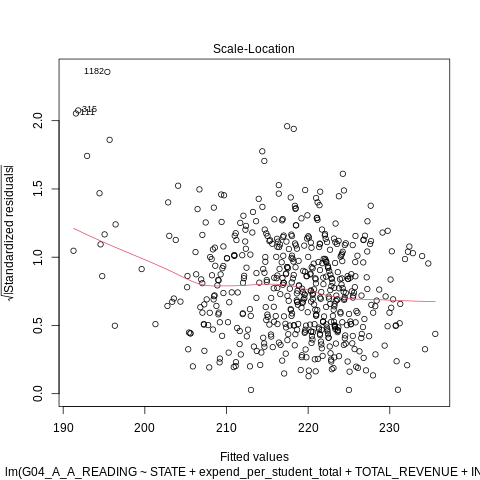

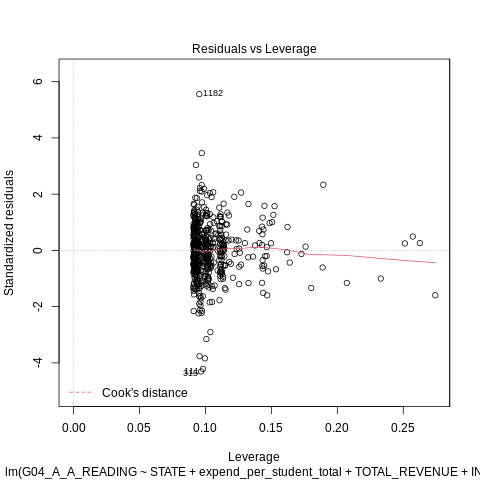

In [ ]:
%%R
#look at residual plots for final model
mod_1_final <- lm(G04_A_A_READING ~ STATE + expend_per_student_total + 
    TOTAL_REVENUE  + INSTRUCTION_EXPENDITURE + SUPPORT_SERVICES_EXPENDITURE)
plot(mod_1_final)

The residual plots show that there may be an issue with heteroscedasticity, as the Scale-Location plot shows a decreasing trend. There is also some non-normal behavior in the tails of the Normal Q-Q plot, but otherwise it looks fine. Overall, there aren't any major issues with the assumptions of linear regression models. 

### Ridge Regression

---



We used the variables from the regression model to feed into our machine learning model. We then dropped the NA values and looked at how many data points were left. 

In [ ]:
import pandas as pd
import numpy as np

#create a new dataset of variables we will be using
data = df[["STATE", "PER_PUPIL", "TOTAL_REVENUE", 
           "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", 
           "G04_A_A_READING"]]

#drop all null values
data = data.dropna()

#see how much data we have
len(data)

523

We see that we will be working with 523 rows of data.

Next, we started building our model. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
#label encode state as numbers rather than state names
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['STATE'])

#set input variables to variable X
X = data[["State", "PER_PUPIL", "TOTAL_REVENUE", 
           "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE"]]

#set target variable (scores)
y = data[['G04_A_A_READING']]

#transform to pandas series
X = X.squeeze()
y = y.squeeze()

#print shapes of input and target 
print('X shape', X.shape)
print('y shape', y.shape)

X shape (523, 5)
y shape (523,)


We split up our data into training, validation, and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
#Split into training, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

#print the shape of training, validation, and test set
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(313, 5)
(313,)
(105, 5)
(105,)
(105, 5)
(105,)


We loaded the necessary packages.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.display import clear_output

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)


We decided to use Ridge Regression because it is useful for analyzing multiple regression data. We chose this over Lasso regression because it won't set any predictors to 0, yet it will still regularize coefficients.

In [ ]:
#set regularization term
lambda_term=1
#set degree of polynomial
Degree_of_the_Polynomial_Model=4 #change?
polybig_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model,
                                      include_bias=False)
std_scaler = StandardScaler()

Ridge_lin_reg = Ridge(alpha=lambda_term)

#create ridge regression pipeline
ridge_regression_pipeline = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("Ridge_lin_reg", Ridge_lin_reg),
    ])

#the pipeline to the training data
ridge_regression_pipeline.fit(X_train, y_train)

#Calculate the model's parameters error
np.random.seed(1)
err = np.std([ridge_regression_pipeline.fit(*resample(X_train, y_train)).
              named_steps.Ridge_lin_reg.coef_
              for i in range(1000)], 0)

params = pd.Series(ridge_regression_pipeline.named_steps.Ridge_lin_reg.coef_, 
                   index=ridge_regression_pipeline.named_steps.poly_features.
                   get_feature_names_out(X_train.columns))
pd.DataFrame({'effect': params.round(0),'error': err.round(0)})


,effect,error
State,9.0,2.0
PER_PUPIL,1.0,2.0
TOTAL_REVENUE,3.0,2.0
INSTRUCTION_EXPENDITURE,5.0,2.0
SUPPORT_SERVICES_EXPENDITURE,-1.0,2.0
...,...,...
INSTRUCTION_EXPENDITURE^4,2.0,1.0
INSTRUCTION_EXPENDITURE^3 SUPPORT_SERVICES_EXPENDITURE,2.0,1.0
INSTRUCTION_EXPENDITURE^2 SUPPORT_SERVICES_EXPENDITURE^2,1.0,0.0
INSTRUCTION_EXPENDITURE SUPPORT_SERVICES_EXPENDITURE^3,1.0,0.0


We want to see how the model does on our training set so we calculate the root means squared error which is a distance measure between the predicted and true values of the target variable.

In [ ]:
RMSE_training_LR=np.sqrt(mean_squared_error(y_train, ridge_regression_pipeline.predict(X_train)))
print("RMSE from Training=" + str(round(RMSE_training_LR, 4)))

predict = ridge_regression_pipeline.predict(X_train)


RMSE from Training=6.363


Next, we can evaluate the model's performance on the validation set to find which degree and lambda term results in the best model. 

In [ ]:
RMSE_val_LR=np.sqrt(mean_squared_error(y_val, ridge_regression_pipeline.predict(X_val)))
print("RMSE from validation=" + str(round(RMSE_val_LR, 4)))

RMSE from validation=6.1845


After working on the model, we see how our model performs on the test set.

In [ ]:
RMSE_test_LR=np.sqrt(mean_squared_error(y_test, ridge_regression_pipeline.predict(X_test)))
print("RMSE from test set=" + str(round(RMSE_test_LR, 4)))

RMSE from test set=6.7641


The RMSE is the root mean squared error. This measure indicates the standard deviation of the residuals or errors. This is an indication of how spread the data is from the line of best fit. We could not add any more degrees of polynomial without overfitting to the training set. Therefore, this model could be improved upon with more data. Additionally, we see that the model performs better on the training and validation data. Again, this model could be more improved with more data. We will discuss implications of missing data in the future directions section.  

This model will help to predict average test scores in states based on their per pupil expenditure, their total revenue, their intruction expenditure, and their support services expenditure. Models like this can help states predict their test score outcomes based on their funding each year. 


# ***Deployment***
The visuals created in the exploratory data analysis section show that there is a positive relationship between the total expenditure per pupil and grade 4 average math scores. In addition to this, states such as New Jersey, Vermont and New York have very high spending per pupil. Looking at the plot of grade 4 math scores for each state, we see that, northeast states such as New Jersey and Vermont have high scores. This implies that, the total expenditure provided by the state, may have an influence on the performance of students in institutions found in that state. 

The scatter plot of instruction expenditure with grade 4 math scores shows a weak positive realtionship. However, looking at the bar plots of states with high  instruction expenditure, we see New York and New Jersey having relatively high  instruction expenditure as compared to other states. New Jersey for example, had high grade 4 scores and total expenditure compared to other states. This illustrates that, state expenditure may have a strong influnce on education. This validates our hypothesis. 

Additionally, since states spend education money differently, we wanted to look at states spending habits compared to their test score outcomes. Comparing Alaska to Nevada allowed us to look at how Alaska's more equitable spending policy may impact outcomes. Nevada spends much more on low-poverty schools, whereas Alaska spends more on high-poverty schools. Since we don't have socioeconomic status data, we decided to look at Black and white students scores in each state. From our background research, we know that Black students are more likely to attend underresourced schools. Due to segregation, Black students are also more likely to be attending schools that are predominantly students of color. The average 4th grade reading score of Black students in Alaska is significantly higher than in Nevada. Therefore, there may be a relationship between targeted funding towards schools with higher population of Black students or schools with less revenue and student outcomes. Policymakers should further explore different states funding policies to determine if allocating more money to high-poverty schools, the way Alaska does, can impact student outcomes. 



# *Future Directions*

Most importantly, states should become more vigilant with data collection and analysis. Education funding inequity and outcome disparities are pressing issues to society. With most of the power in state and local hands, it would be in their best interest to collect relevant data that would make it easier to explore this issue. We noticed in our research that even with multiple data sources, a lot of information was still missing. This data should be collected more often and analyzed each year to explore potential solutions to the problem.